# Adaptive Novelty Detection with PADASIP Module

The basics of novelty detection with adaptive filters are explained in this tutorial. The simple adaptive novelty detection used in Padasip module utilizes incrementation of adaptive weights and error of an adaptive filter. 

Lets start with importing padasip. In the following examples we will also use numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import padasip as pa

%matplotlib inline

## Detection of a System Change (example with RLS filter)

Consider the following system

$d(k) = 0.8 d(k-1) - 0.6 d(k-2) + 2 u(k) + 0.1 u(k-1) - 4 u(k-2) + 0.5 u(k-3)$.

After $500$ samples the system changes as follows

$d(k) = 0.3 d(k-1) - 0.4 d(k-2) + 2 u(k) + 0.1 u(k-1) - 4 u(k-2) + 0.5 u(k-3)$.

And from sample $700$ the system continues according to the equation

$d(k) = 0.3 d(k-1) - 0.4 d(k-2) + 2 u(k) + 0.1 u(k-1) - 1 u(k-2) + 0.3 u(k-3)$.

This system can be simulated as

In [2]:
u = np.random.random(1000)
d = np.zeros(1000)
for k in range(3,1000):
    if k < 500:
        d[k] = 0.8*d[k-1] - 0.6*d[k-2] + 2*u[k] + 0.1*u[k-1] - 4*u[k-2] + 0.5*u[k-3] 
    elif k < 700:
        d[k] = 0.3*d[k-1] - 0.4*d[k-2] + 2*u[k] + 0.1*u[k-1] - 4*u[k-2] + 0.5*u[k-3] 
    else:
        d[k] = 0.3*d[k-1] - 0.4*d[k-2] + 2*u[k] + 0.1*u[k-1] - 1*u[k-2] + 0.3*u[k-3] 

For system change detection we will use the RLS adaptive filter with a size of 10. The evaluation can be done as follows

In [3]:
# create empty matrix (input matrix)
x = np.zeros((1000, 10))

# fill empty imput matrix with delayed values of d
x[9:] = pa.input_from_history(u, 10)

# finally, estimate the novelty in data
y, e, w, nd = pa.rls_novelty(d, x, mu=0.1)

where the variable nd stands for novelty detection coefficients matrix of the data $\textbf{d}$ obtained from the RLS adaptive algorithm. Visualization can be done as

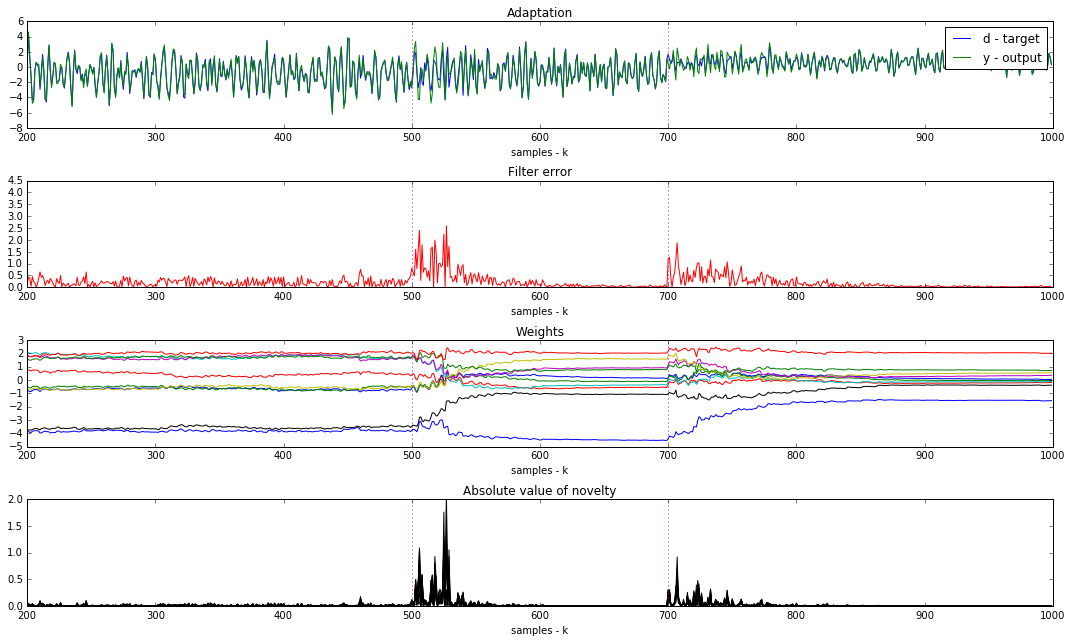

In [4]:
plt.figure(figsize=(15,9))
plt.subplot(411);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(412);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(abs(e),"r", label="e - prediction error")
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(413);plt.title("Weights");plt.xlabel("samples - k")
plt.plot(w)
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(414);plt.title("Absolute value of novelty");plt.xlabel("samples - k")
plt.plot(abs(nd),"k")
plt.xlim(200, 1000); plt.ylim(0, 2); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.tight_layout()
plt.show()

In the figure it is possible to see that the filter error and the weights carry different information about the system change. That is the reason why adaptive novelty detection can be beneficial for detection of system change. First 200 samples are skipped because during the start of training the novelty is really high.

## Detection of Outliers (Perturbations) in Time Serries (Example with NLMS filter)

Consider a system, with inserted perturbations in samples $500$, $700$. The system can be described as

$d(k) = a_1 u(k) + a_2 u(k-1) + a_3 u(k-2) + a_4 u(k-3) + v(k)$

where $v(k)$ is noise (random number in range from 0 to 1). The size of inserted perturbations is 2.

In [5]:
u = np.random.random(1000)
d = np.zeros(1000)
for k in range(3,1000):
    d[k] = 2*u[k] + 0.1*u[k-1] - 4*u[k-2] + 0.5*u[k-3] + np.random.random(1)
# and now the perturbations:
d[500] += 2
d[700] += 2

The novelty in data can be estimated with the NLMS filter as follows

In [6]:
x = np.zeros((1000, 10))
x[9:] = pa.input_from_history(u, 10)
y, e, w, nd = pa.nlms_novelty(d, x, mu=1.)

And the visualization follows

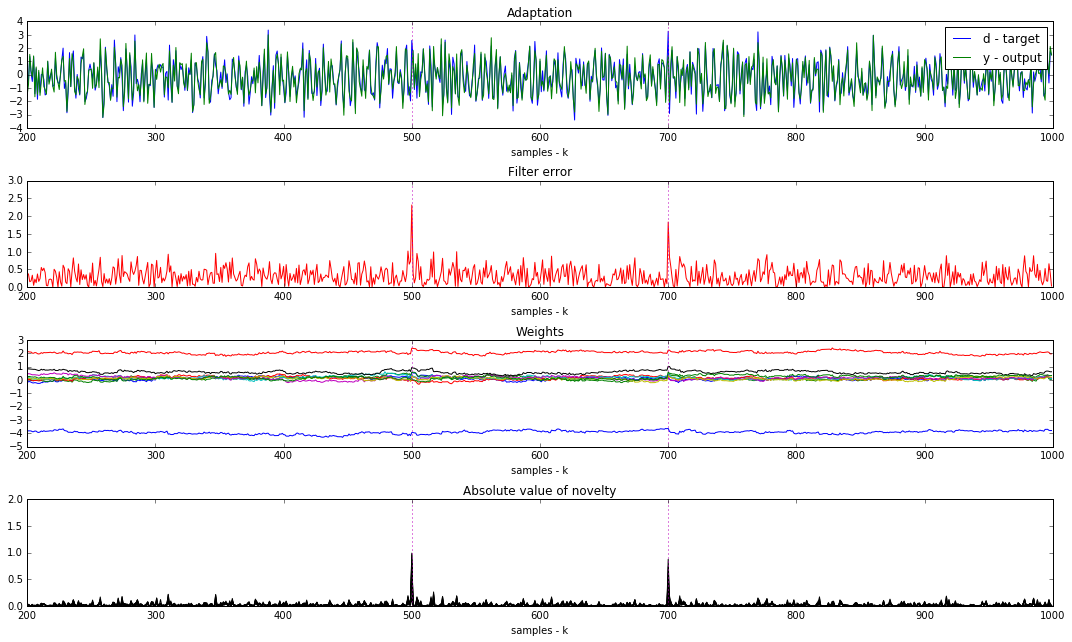

In [7]:
plt.figure(figsize=(15,9))
plt.subplot(411);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(412);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(abs(e),"r", label="e - prediction error")
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(413);plt.title("Weights");plt.xlabel("samples - k")
plt.plot(w)
plt.xlim(200, 1000); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.subplot(414);plt.title("Absolute value of novelty");plt.xlabel("samples - k")
plt.plot(abs(nd),"k")
plt.xlim(200, 1000); plt.ylim(0, 2); plt.axvline(500, color="m", linestyle=":"); plt.axvline(700, color="m",linestyle=":")
plt.tight_layout()
plt.show()